<div style="text-align:center; border-radius:15px; padding:15px; color:#FFC0CB; margin:0; font-size:150%; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;"><b>Employee Performance and Salary Analysis</b></div>

In the world of business, understanding the factors that drive employee performance and salary can be the difference between a thriving company and one that struggles. This dataset provides a fascinating opportunity to explore these dynamics and uncover insights that could be pivotal for HR departments everywhere.

## Table of Contents
1. [Introduction](#Introduction)
2. [Data Overview](#Data-Overview)
3. [Data Preprocessing](#Data-Preprocessing)
4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - 4.1 [Demographic Analysis](#Demographic-Analysis)
    - 4.2 [Salary Analysis](#Salary-Analysis)
    - 4.3 [Performance Analysis](#Performance-Analysis)
5. [Correlation Analysis](#Correlation-Analysis)
6. [Predictive Modeling](#Predictive-Modeling)
7. [Discussion and Conclusion](#Discussion-and-Conclusion)


## Introduction
In this notebook, we will delve into the Employee Performance and Salary dataset to extract meaningful insights. We will explore the relationships between various factors such as age, department, experience, and performance scores, and how they influence salary. Additionally, we will attempt to build a predictive model to estimate employee performance based on available features.

## Data Overview
Let's start by loading the dataset and taking a quick look at its structure.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load the dataset
file_path = '/kaggle/input/employee-performance-and-salary-dataset/Employe_Performance_dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,ID,Name,Age,Gender,Department,Salary,Joining Date,Performance Score,Experience,Status,Location,Session
0,1,Cory Escobar,48,Female,HR,5641,2015-05-03,2.0,16,Active,New York,Night
1,2,Timothy Sanchez,25,Other,Sales,4249,2020-11-09,2.0,11,Inactive,Los Angeles,Evening
2,3,Chad Nichols,57,Other,Sales,3058,2019-02-12,NaN,1,Inactive,New York,Morning
3,4,Christine Williams,58,Female,IT,5895,2017-09-08,2.0,13,Inactive,Los Angeles,Evening
4,5,Amber Harris,35,Other,IT,4317,2020-02-15,5.0,16,Inactive,New York,Evening


## Data Preprocessing
Before diving into analysis, we need to preprocess the data. This includes handling missing values, converting data types, and extracting useful features.

In [2]:
# Convert 'Joining Date' to datetime
df['Joining Date'] = pd.to_datetime(df['Joining Date'], errors='coerce')

# Check for missing values
missing_values = df.isnull().sum()
missing_values

ID                     0
Name                   0
Age                    0
Gender                 0
Department             0
Salary                 0
Joining Date           0
Performance Score    498
Experience             0
Status                 0
Location               0
Session                0
dtype: int64

## Exploratory Data Analysis
Let's explore the dataset to understand the distribution of various features and their relationships.

### Demographic Analysis
We'll start by analyzing the demographic distribution of employees.

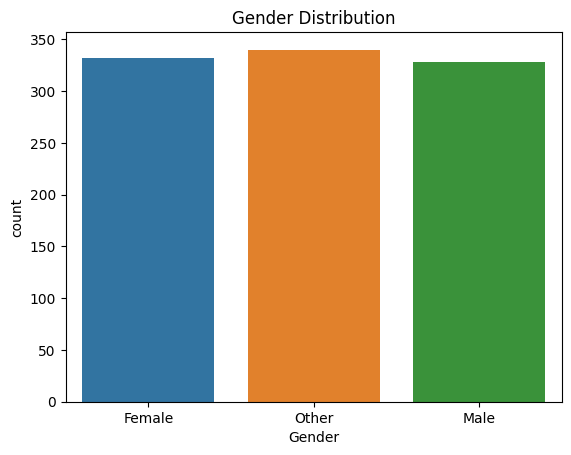

In [3]:
# Gender distribution
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

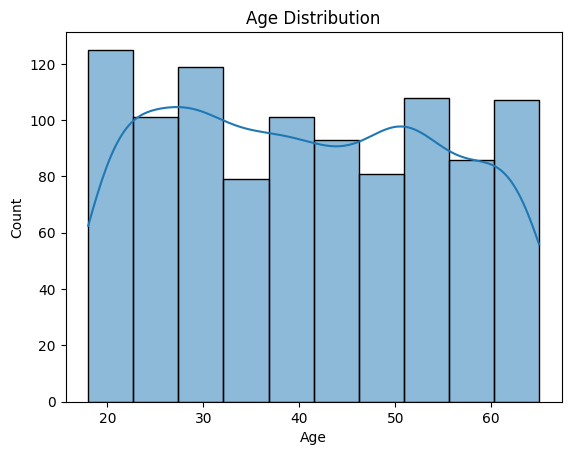

In [4]:
# Age distribution
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.show()

### Salary Analysis
Next, let's examine the salary distribution and its relationship with other features.

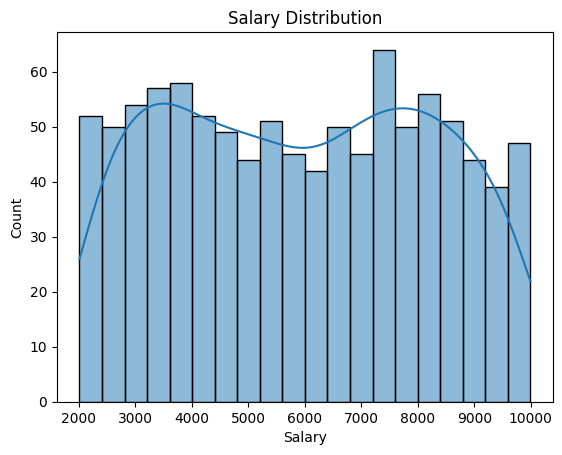

In [6]:
# Salary distribution
sns.histplot(df['Salary'], bins=20, kde=True)
plt.title('Salary Distribution')
plt.show()

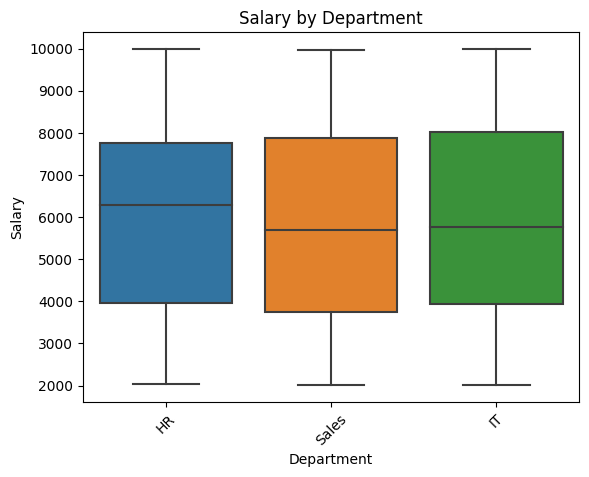

In [7]:
# Salary by Department
sns.boxplot(x='Department', y='Salary', data=df)
plt.title('Salary by Department')
plt.xticks(rotation=45)
plt.show()

### Performance Analysis
Let's explore the performance scores and their correlation with other features.

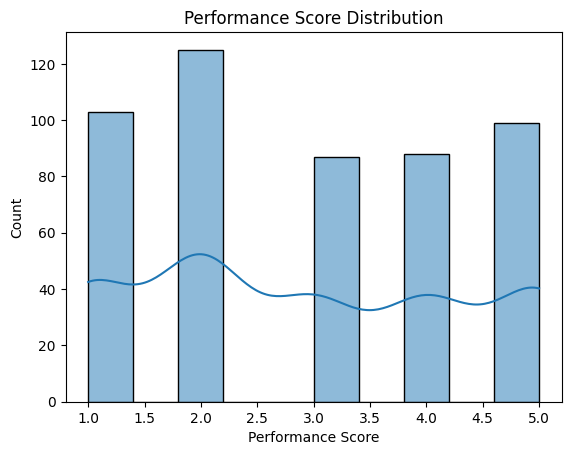

In [8]:
# Performance Score distribution
sns.histplot(df['Performance Score'].dropna(), bins=10, kde=True)
plt.title('Performance Score Distribution')
plt.show()

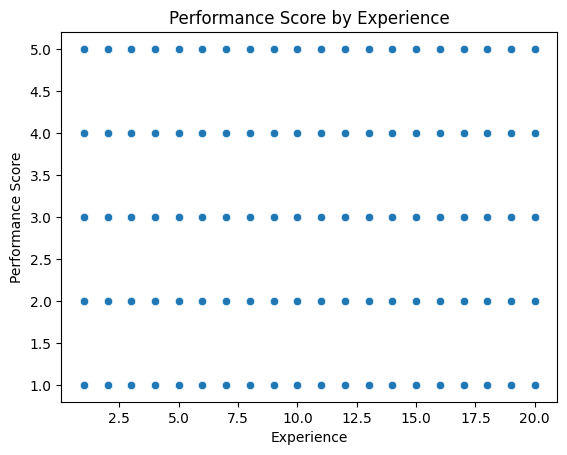

In [9]:
# Performance Score by Experience
sns.scatterplot(x='Experience', y='Performance Score', data=df)
plt.title('Performance Score by Experience')
plt.show()

## Correlation Analysis
Let's examine the correlation between numeric features to identify any strong relationships.

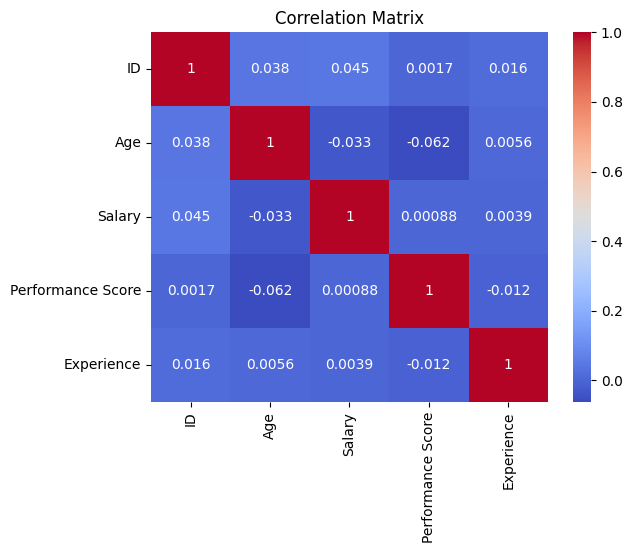

In [10]:
# Select numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Predictive Modeling
Let's attempt to build a predictive model to estimate employee performance based on available features.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Prepare data for modeling
features = ['Age', 'Experience', 'Salary']
df_model = df.dropna(subset=['Performance Score'])
X = df_model[features]
y = df_model['Performance Score']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse

2.2558891089108912

## Discussion and Conclusion
In this notebook, we explored the Employee Performance and Salary dataset to uncover insights into the factors influencing employee performance and salary. We visualized the distribution of demographic features, salary, and performance scores, and examined their relationships. Additionally, we built a predictive model to estimate performance scores based on age, experience, and salary.

While our model provides a starting point, there is room for improvement. Future analysis could incorporate additional features, such as department and location, to enhance predictive accuracy. Moreover, exploring advanced modeling techniques could yield better results.

If you found this notebook insightful, please consider upvoting it.

## Credits
This notebook was created with the help of [Devra AI data science assistant](https://devra.ai/ref/kaggle)